<h1>Clasificación del ONI</h1>

In [1]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

Cargamos la data de la NOAA

In [8]:
df_oni = pd.read_csv('..\Data\ONI_NOAA.txt', sep="\s+")

# Creamos nuevas columnas
df_oni['TIME'] = pd.to_datetime(
    dict(year=df_oni["YR"], month=df_oni["MON"], day=1), format='%Y-%m')
df_oni['category'] = df_oni['ANOM'].apply(
    lambda x: 'Niño' if x >= 0.5 else 'Neutro' if x > -0.5 else 'Niña')

df_oni

,YR,MON,TOTAL,ClimAdjust,ANOM,TIME,category
0,1993,1,26.70,26.59,0.10,1993-01-01,Neutro
1,1993,2,27.17,26.79,0.38,1993-02-01,Neutro
2,1993,3,27.68,27.28,0.40,1993-03-01,Neutro
3,1993,4,28.41,27.70,0.71,1993-04-01,Niño
4,1993,5,28.71,27.80,0.91,1993-05-01,Niño
...,...,...,...,...,...,...,...
331,2020,8,26.27,26.86,-0.59,2020-08-01,Niña
332,2020,9,25.89,26.72,-0.83,2020-09-01,Niña
333,2020,10,25.46,26.72,-1.25,2020-10-01,Niña
334,2020,11,25.28,26.70,-1.42,2020-11-01,Niña


Cambiamos los meses numéricos por los sustantivos de cada mes

In [10]:
meses = {
            1  : 'Enero',
            2  : 'Febrero',
            3  : 'Marzo',
            4  : 'Abril',
            5  : 'Mayo',
            6  : 'Junio',
            7  : 'Julio',
            8  : 'Agosto',
            9  : 'Septiembre',
            10 : 'Octubre',
            11 : 'Noviembre',
            12 : 'Diciembre'
        }

df_oni = df_oni.replace({ 'MON' : meses}, regex=True)

df_oni


,YR,MON,TOTAL,ClimAdjust,ANOM,TIME,category
0,1993,Enero,26.70,26.59,0.10,1993-01-01,Neutro
1,1993,Febrero,27.17,26.79,0.38,1993-02-01,Neutro
2,1993,Marzo,27.68,27.28,0.40,1993-03-01,Neutro
3,1993,Abril,28.41,27.70,0.71,1993-04-01,Niño
4,1993,Mayo,28.71,27.80,0.91,1993-05-01,Niño
...,...,...,...,...,...,...,...
331,2020,Agosto,26.27,26.86,-0.59,2020-08-01,Niña
332,2020,Septiembre,25.89,26.72,-0.83,2020-09-01,Niña
333,2020,Octubre,25.46,26.72,-1.25,2020-10-01,Niña
334,2020,Noviembre,25.28,26.70,-1.42,2020-11-01,Niña


Juntamos en una columna el valor del mes con la clasificación

In [11]:
df_oni["month_anomaly"] = df_oni["MON"] + " de " + df_oni["category"]
df_oni

,YR,MON,TOTAL,ClimAdjust,ANOM,TIME,category,month_anomaly
0,1993,Enero,26.70,26.59,0.10,1993-01-01,Neutro,Enero de Neutro
1,1993,Febrero,27.17,26.79,0.38,1993-02-01,Neutro,Febrero de Neutro
2,1993,Marzo,27.68,27.28,0.40,1993-03-01,Neutro,Marzo de Neutro
3,1993,Abril,28.41,27.70,0.71,1993-04-01,Niño,Abril de Niño
4,1993,Mayo,28.71,27.80,0.91,1993-05-01,Niño,Mayo de Niño
...,...,...,...,...,...,...,...,...
331,2020,Agosto,26.27,26.86,-0.59,2020-08-01,Niña,Agosto de Niña
332,2020,Septiembre,25.89,26.72,-0.83,2020-09-01,Niña,Septiembre de Niña
333,2020,Octubre,25.46,26.72,-1.25,2020-10-01,Niña,Octubre de Niña
334,2020,Noviembre,25.28,26.70,-1.42,2020-11-01,Niña,Noviembre de Niña


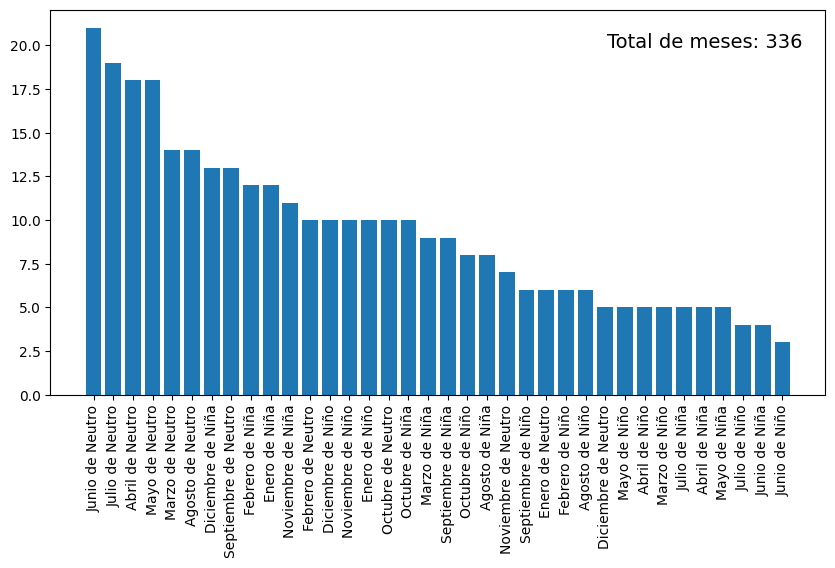

In [13]:
# Plot del numero de peses por categoria y frecuencia
counts = df_oni["month_anomaly"].value_counts()

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(counts.index, counts.values)
ax.text(0.97, 0.90, "Total de meses: " + str(len(df_oni)),
        transform=ax.transAxes, fontsize=14, ha="right")

plt.xticks(rotation=90)

plt.show()

fig.savefig('..\Imagenes\Frecuencia ONI por mes.png', dpi=500, bbox_inches = 'tight')

Cargamos la data del netCDF

In [14]:
ds_currents = xr.open_dataset("..\Data\corrientes_u_v_5m_enero1993_diciembre2020.nc")
ds_currents = ds_currents.mean(dim="depth")

# Extraemos las coordenadas indexables según la documentación de la librería Xarray
lat = ds_currents.latitude.values
lon = ds_currents.longitude.values
time = ds_currents.time.values

# Extraemos las variables
vo = ds_currents.vo.values
uo = ds_currents.uo.values

ds_currents

<xarray.Dataset>
Dimensions:    (latitude: 205, time: 336, longitude: 372)
Coordinates:
  * latitude   (latitude) float32 7.0 7.083 7.167 7.25 ... 23.83 23.92 24.0
  * time       (time) datetime64[ns] 1993-01-16T12:00:00 ... 2020-12-16T12:00:00
  * longitude  (longitude) float32 -89.92 -89.83 -89.75 ... -59.17 -59.08 -59.0
Data variables:
    vo         (time, latitude, longitude) float32 0.03101 0.06458 ... 0.04016
    uo         (time, latitude, longitude) float32 0.07703 0.08228 ... 0.06006

Creamos un dataset donde despreciaremos la profundidad pues se promedió, para continuar la nueva dimensión que se añade es la clasificación de mes y anomalía

In [15]:
month_anomaly_currents = xr.Dataset(
    data_vars={
        "vo": (["month_anomaly", "lat", "lon"], vo),
        "uo": (["month_anomaly", "lat", "lon"], uo),
    },
    coords={
        "month_anomaly": df_oni["month_anomaly"].values, "lat": lat, "lon": lon
    }
).groupby("month_anomaly").mean()  # Groupby por mes y anomalía promediados

month_anomaly_currents.to_netcdf("..\Data\corrientes_month_anomaly.nc")

Guardamos el nuevo netCDF más ligero y con una clasificación útil para el estudio